In [13]:
import os, skimage.io, matplotlib.pyplot as plt, numpy as np
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import random

In [8]:
folderName = "MNIST fashion dataset"
labelNames = ["T-shirt/top",
              "Trouser",
              "Pullover",
              "Dress",
              "Coat",
              "Sandal",
              "Shirt",
              "Sneaker",
              "Bag",
              "Ankle boot"]
#these directly correspond to the folders names 0-9
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
        if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        print("loading:",labelNames[int(d)],"from",label_directory)
        file_names = [os.path.join(label_directory, f)for f in os.listdir(label_directory)]
    
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(labelNames[int(d)])
        
    return images, labels

In [11]:
train_data_path = os.path.join(os.getcwd(),folderName,"training")
images, labels = load_data(train_data_path)

loading: T-shirt/top from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\training\0
loading: Trouser from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\training\1
loading: Pullover from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\training\2
loading: Dress from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\training\3
loading: Coat from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\training\4
loading: Sandal from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\training\5
loading: Shirt from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\training\6
loading: Sneaker from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\training\7
loading: Bag from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\training\8
loading: Ankle boot from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\training\9


In [10]:
test_data_path = os.path.join(os.getcwd(),folderName,"testing")
test_images, test_labels = load_data(test_data_path)

loading: T-shirt/top from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\testing\0
loading: Trouser from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\testing\1
loading: Pullover from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\testing\2
loading: Dress from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\testing\3
loading: Coat from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\testing\4
loading: Sandal from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\testing\5
loading: Shirt from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\testing\6
loading: Sneaker from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\testing\7
loading: Bag from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\testing\8
loading: Ankle boot from C:\Users\Declan\Repos\machine-learning-a2\MNIST fashion dataset\testing\9


In [51]:
#now we are converting them to numpy arrays
images = np.asarray(images)
test_images = np.asarray(test_images)
labels = np.asarray(labels)
test_labels = np.asarray(test_labels)

#and then we splitting them up inot train and validation
train_images,validation_images,train_labels,validation_labels = train_test_split(
    images,
    labels, 
    train_size=0.9, 
    test_size=0.1,
    random_state=0)

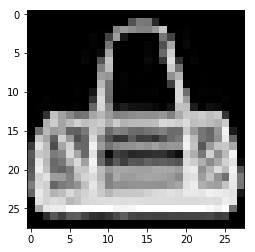

 ^ This is: Bag  ^ 


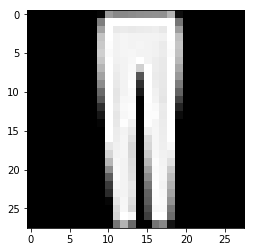

 ^ This is: Trouser  ^ 


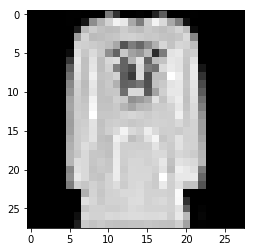

 ^ This is: Dress  ^ 


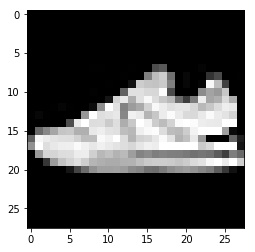

 ^ This is: Sneaker  ^ 


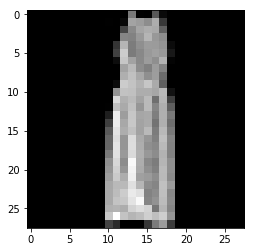

 ^ This is: Dress  ^ 


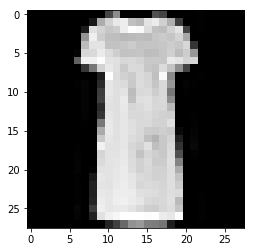

 ^ This is: Dress  ^ 


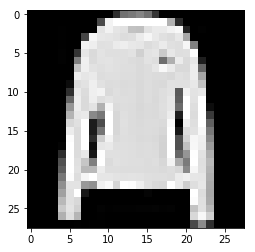

 ^ This is: Coat  ^ 


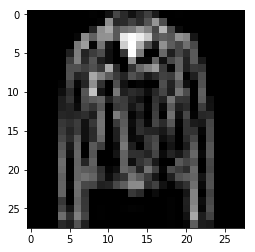

 ^ This is: Coat  ^ 


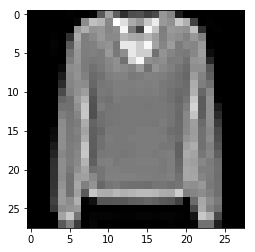

 ^ This is: Pullover  ^ 


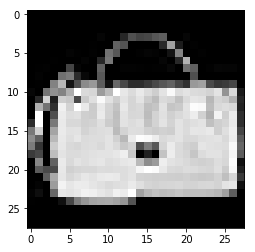

 ^ This is: Bag  ^ 


In [50]:
#now quickly testing the right labels are applied
for i in range(0,10):
    plt.plot()
    randImg = random.randint(0,test_images.shape[0])
    plt.imshow(train_images[randImg], cmap=plt.get_cmap('gray'))
    plt.show()
    print(" ^ This is:",train_labels[randImg]," ^ ")


In [52]:
#now reformatting the images a single dimension arrays of pixels
num_pixels = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0],num_pixels).astype('float32')
validation_images = validation_images.reshape(validation_images.shape[0],num_pixels).astype('float32')
test_images = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

In [54]:
#now we need to convert these labels to something that can be read
train_labels = np_utils.to_categorical(train_labels)
validation_labels = np_utils.to_categorical(validation_labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = train_labels.shape[1]

#becasue this doesnt work

ValueError: invalid literal for int() with base 10: 'Bag'